# Analysis of the results from part 1 of model training

In [1]:
%conda install matplotlib

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
from typing import cast
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# initialise spark session
spark = cast(SparkSession, SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Team4-Project-Hsin-Pao-Huang") \
    .getOrCreate()
)

sc = spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/12 12:06:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/12 12:06:13 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
part_1_results = spark.read.load('../data/part_1_results_df')
part_1_results.cache()

DataFrame[model_index: bigint, model_auroc: double]

### Statistical Analysis of the Area Under ROC of each model

In [4]:
part_1_results.describe('model_auroc').show()
part_1_results.select(F.median('model_auroc')).show()

+-------+--------------------+
|summary|         model_auroc|
+-------+--------------------+
|  count|                 100|
|   mean|  0.5273723723723723|
| stddev|0.047801166919551316|
|    min|   0.409468291821233|
|    max|  0.6437025260554673|
+-------+--------------------+

+-------------------+
|median(model_auroc)|
+-------------------+
| 0.5265854089383502|
+-------------------+



<Axes: title={'center': 'Distribution of Performance of Models from part 1'}, ylabel='Frequency'>

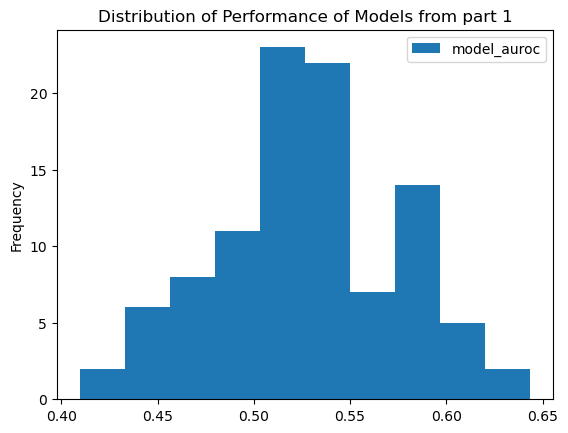

In [5]:
part_1_results.select('model_auroc').toPandas().plot.hist(
    title='Distribution of Performance of Models from part 1',
)

### Ranking Models by their Area Under ROC

In [9]:
part_1_results.orderBy('model_auroc', ascending=False).limit(10).show()

+-----------+------------------+
|model_index|       model_auroc|
+-----------+------------------+
|         93|0.6437025260554673|
|         34|0.6225048577989754|
|         67|0.6101395513160219|
|         40|0.6074898427839603|
|         69|0.6046634870164281|
|          4| 0.602543720190779|
|         19|0.5972443031266561|
|         92|0.5945945945945946|
|          6|0.5937113584172408|
|         42|0.5919448860625331|
+-----------+------------------+

